<a href="https://colab.research.google.com/github/offthetab/statistics_homework/blob/main/%D0%9F%D0%A0_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from math import e

In [ ]:
# изначальные данные для перебора
values = {'m': [3, 5,7, 9],
          'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
lag = 5

values['m']

[3, 5, 7, 9]

In [ ]:
# Q-статистика Льюнг-Бокса

#H0: Автокорреляция остатков отсутствует.
#H1: Автокорреляция остатков присутствует.

def Q-stat():



In [ ]:
# Тест Дарбина-Уотсона

In [ ]:
# Читаем файл 1
df1 = pd.read_csv('1.txt', header=None)
df1.columns = ['y']
df1['t'] = np.arange(0, df1.shape[0])
df1.head(66)

,y,t
0,2.468328,0
1,0.147127,1
2,-0.778776,2
3,-1.758678,3
4,-1.627743,4
...,...,...
59,2.415660,59
60,0.894693,60
61,-0.601190,61
62,-1.383741,62


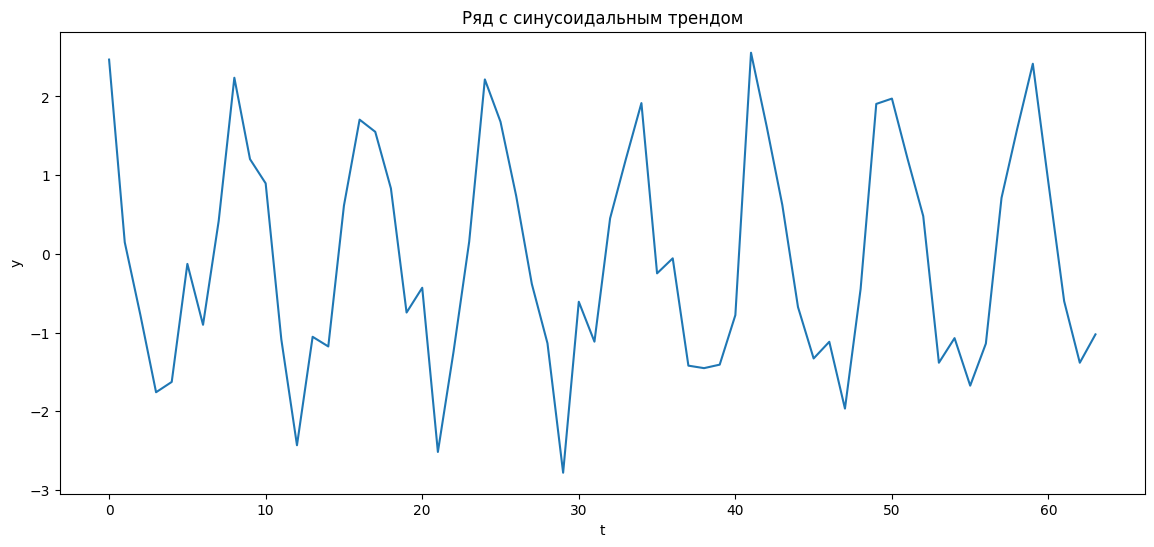

In [ ]:
plt.subplots(figsize=(14,6))
plt.plot(df1['t'], df1['y'])
plt.xlabel('t')
plt.ylabel('y')
plt.title('Ряд с синусоидальным трендом')
plt.show()

In [ ]:
def MA(df, m):
  y = list(df['y'])
  y = ([y[0]] * m) + y + ([y[-1]] * m)

  y_smothen = []
  epsilon = 0.3
  for t in range(m, len(y) - m):
    tmp = np.array(y[t-m:t+m+1])
    w = np.ones(m * 2 + 1) / (2 * m + 1)
    y_smothen.append(np.sum(w * tmp))
  return y_smothen #MA np array

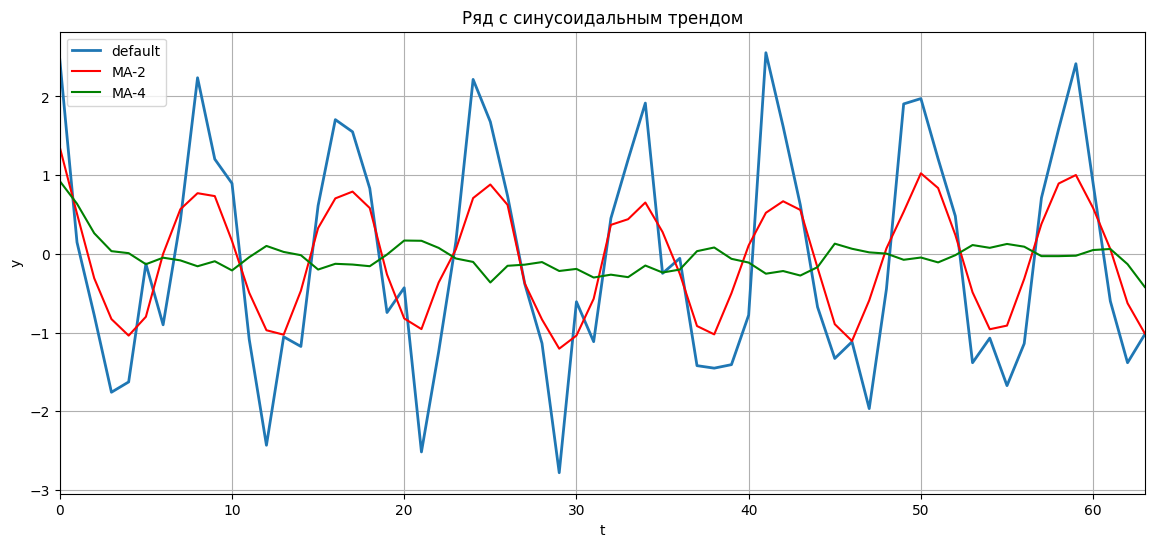

In [ ]:
# Метод простого скользящего среднего (Simple Moving Average, SMA)
df = df1.copy()

df['MA-2'] = MA(df, 2)
df['MA-4'] = MA(df, 4)

plt.subplots(figsize=(14,6))
plt.plot(df['t'], df['y'],linewidth=2 , label='default') # unprocessed
plt.plot(df['t'], df['MA-2'], c='r', label='MA-2') # moving average window size = 2
plt.plot(df['t'], df['MA-4'], c='g', label='MA-4') # moving average window size = 4
plt.xlabel('t')
plt.ylabel('y')
plt.title('Ряд с синусоидальным трендом')
plt.legend()
plt.grid()
plt.xlim((min(df['t']), max(df['t'])))
plt.show()

In [ ]:
df

,y,t,MA-2,MA-4
0,2.468328,0,1.354667,0.924841
1,0.147127,1,0.509266,0.636394
2,-0.778776,2,-0.309948,0.261938
3,-1.758678,3,-0.829152,0.034138
4,-1.627743,4,-1.038935,0.008476
...,...,...,...,...
59,2.415660,59,1.001447,-0.023919
60,0.894693,60,0.582512,0.048479
61,-0.601190,61,0.060398,0.061466
62,-1.383741,62,-0.627420,-0.131241


In [ ]:
def WMA(df, m):
  y = list(df['y'])
  y = ([y[0]] * m) + y + ([y[-1]] * m)

  y_smothen = []
  epsilon = 0.3
  i_abs = np.abs(np.arange(-m, m+1, 1, dtype=int))
  for t in range(m, len(y) - m):
    tmp = np.array(y[t-m:t+m+1])
    w = np.ones(m * 2 + 1) * e ** (- epsilon * i_abs) / np.sum(e ** (- epsilon * i_abs))
    y_smothen.append(np.sum(w * tmp))
  return y_smothen #MA np array


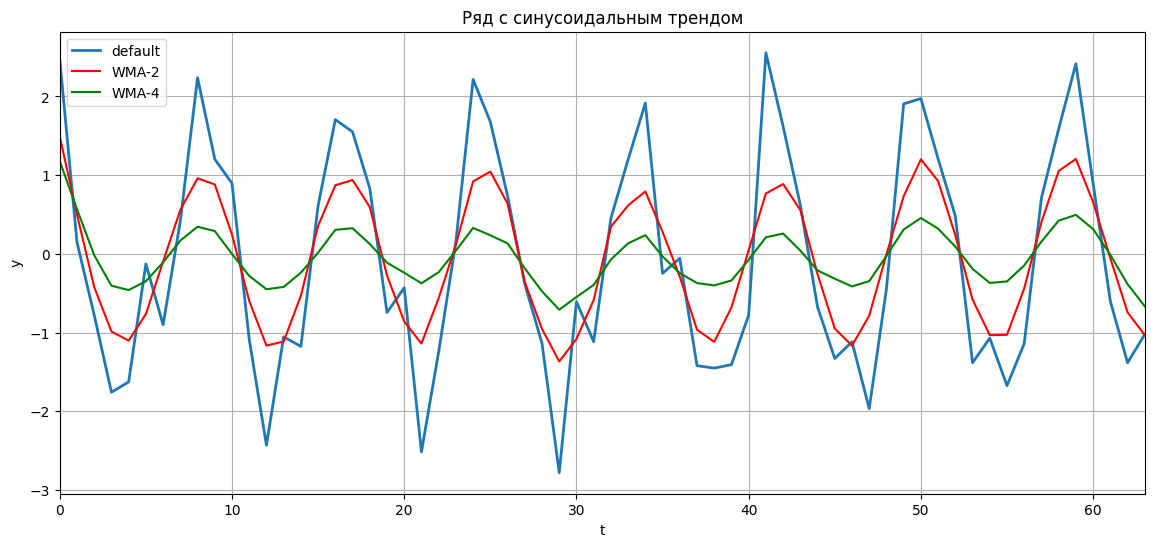

In [ ]:
# Метод взвешенного скользящего среднего (Weighted Moving Average, WMA)
df['WMA-2'] = WMA(df, 2)
df['WMA-4'] = WMA(df, 4)

plt.subplots(figsize=(14,6))
plt.plot(df['t'], df['y'],linewidth=2 , label='default') # unprocessed
plt.plot(df['t'], df['WMA-2'], c='r', label='WMA-2') # Weighted Moving Average window size = 2
plt.plot(df['t'], df['WMA-4'], c='g', label='WMA-4') #Weighted Moving Average window size = 4
plt.xlabel('t')
plt.ylabel('y')
plt.title('Ряд с синусоидальным трендом')
plt.legend()
plt.grid()
plt.xlim((min(df['t']), max(df['t'])))
plt.show()


In [ ]:
def EMA(df, alpha):
  y = df['y'].to_numpy()

  y_smothen = []
  for i, y_ in enumerate(y):
    y_smothen.append(recur(i, y[:i+1], alpha))
  return y_smothen #MA np array

In [ ]:
def recur(i, y_slice, alpha):
  if (i == 0):
    return y_slice[i]
  y_t_smth = alpha * y_slice[i] + (1 - alpha) * recur(i-1, y_slice[:i], alpha)
  return y_t_smth


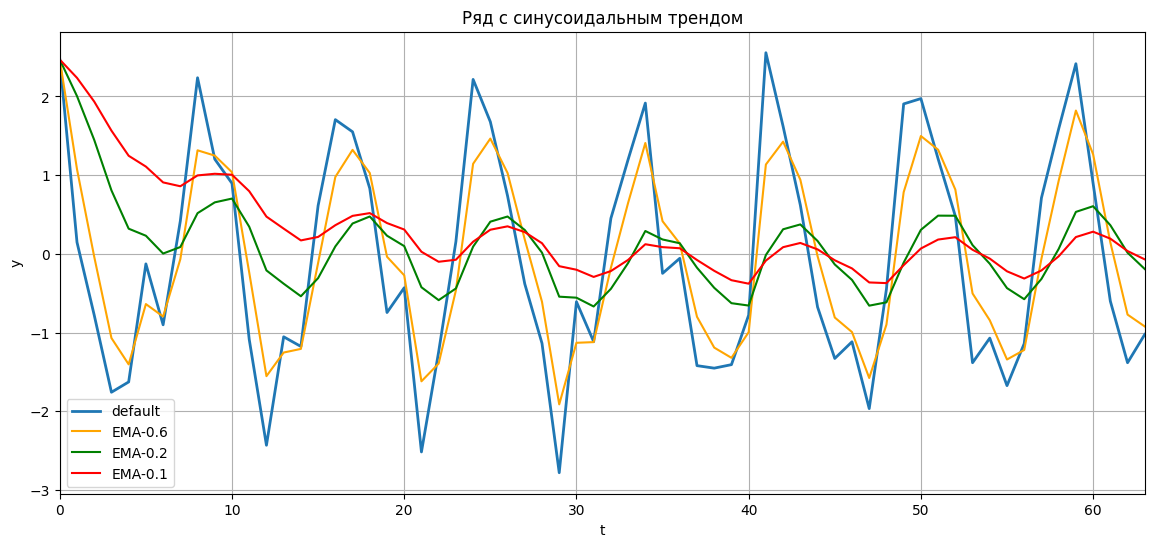

In [ ]:
# Метод экспоненциального сглаживания (EMA). (Exponential weighted moving average", EMA)
df['EMA-0.6'] = EMA(df, 0.6)
df['EMA-0.2'] = EMA(df, 0.2)
df['EMA-0.1'] = EMA(df, 0.1)

plt.subplots(figsize=(14,6))
plt.plot(df['t'], df['y'],linewidth=2 , label='default') # unprocessed
plt.plot(df['t'], df['EMA-0.6'], c='orange', label='EMA-0.6') # WExponential weighted moving average alpha = 0.6
plt.plot(df['t'], df['EMA-0.2'], c='g', label='EMA-0.2') # WExponential weighted moving average alpha = 0.2
plt.plot(df['t'], df['EMA-0.1'], c='r', label='EMA-0.1') # WExponential weighted moving average alpha = 0.1

plt.xlabel('t')
plt.ylabel('y')
plt.title('Ряд с синусоидальным трендом')
plt.legend()
plt.grid()
plt.xlim((min(df['t']), max(df['t'])))
plt.show()

In [ ]:
def DEMA(series, alpha, gamma):
  series = series['y']
  y_ = [series[0]]
  b = [series[1]-series[0]]

  for i, y in enumerate(series):
    if (i == 0):
      continue

    y_.append(alpha * y + (1 - alpha) * (y_[i - 1] + b[i - 1]))
    b.append(gamma * (y - y_[i-1]) + (1 - gamma)* b[i-1])

  return np.array(y_)

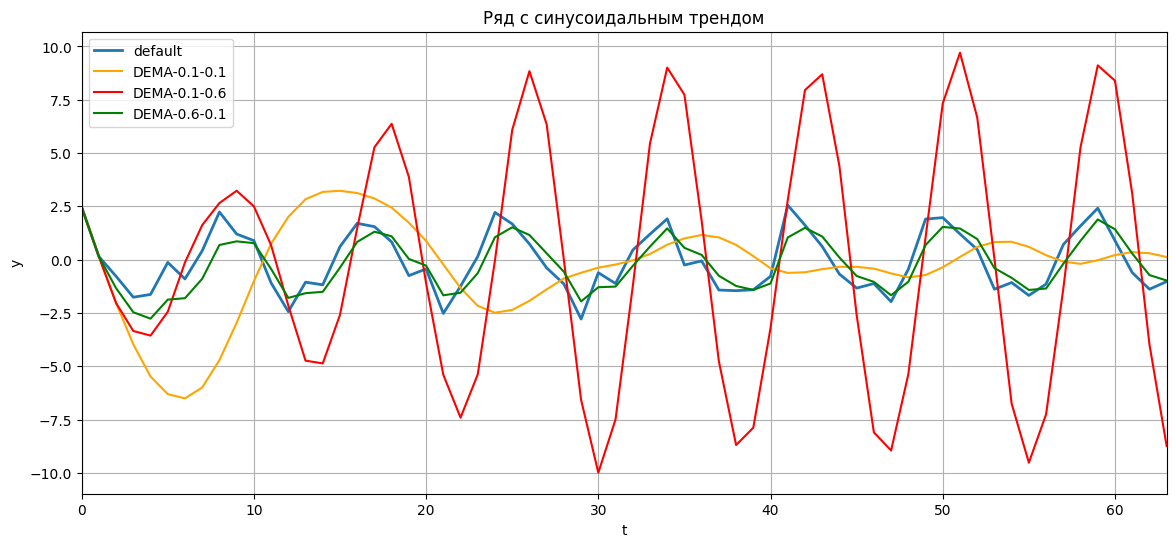

In [ ]:
# Метод двойного экспоненциального сглаживания (DEMA).
# 𝛼 отвечает за сглаживание ряда вокруг тренда, второй 𝛾 – за сглаживание самого тренда
# Чем выше значения, тем больший вес будет отдаваться последним наблюдениям и тем менее сглаженным окажется модельный ряд.
#https://habr.com/ru/companies/ods/articles/327242/

df['DEMA-0.1-0.1'] = DEMA(df, 0.1, 0.1)
df['DEMA-0.1-0.6'] = DEMA(df, 0.1, 0.6)
df['DEMA-0.6-0.1'] = DEMA(df, 0.6, 0.1)



plt.subplots(figsize=(14,6))
plt.plot(df['t'], df['y'],linewidth=2 , label='default') # unprocessed
plt.plot(df['t'], df['DEMA-0.1-0.1'], c='orange', label='DEMA-0.1-0.1') # WExponential weighted moving average alpha = 0.6
plt.plot(df['t'], df['DEMA-0.1-0.6'], c='r', label='DEMA-0.1-0.6') # WExponential weighted moving average alpha = 0.6
plt.plot(df['t'], df['DEMA-0.6-0.1'], c='g', label='DEMA-0.6-0.1') # WExponential weighted moving average alpha = 0.6


plt.xlabel('t')
plt.ylabel('y')
plt.title('Ряд с синусоидальным трендом')
plt.legend()
plt.grid()
plt.xlim((min(df['t']), max(df['t'])))
plt.show()

In [ ]:
# Читаем файл 2
df2 = pd.read_csv('2.txt', header=None)
df2.columns = ['y']
df2['t'] = np.arange(0, df2.shape[0])
df2.head()

,y,t
0,2.216981,0
1,-1.474007,1
2,4.543224,2
3,4.249902,3
4,-1.499057,4


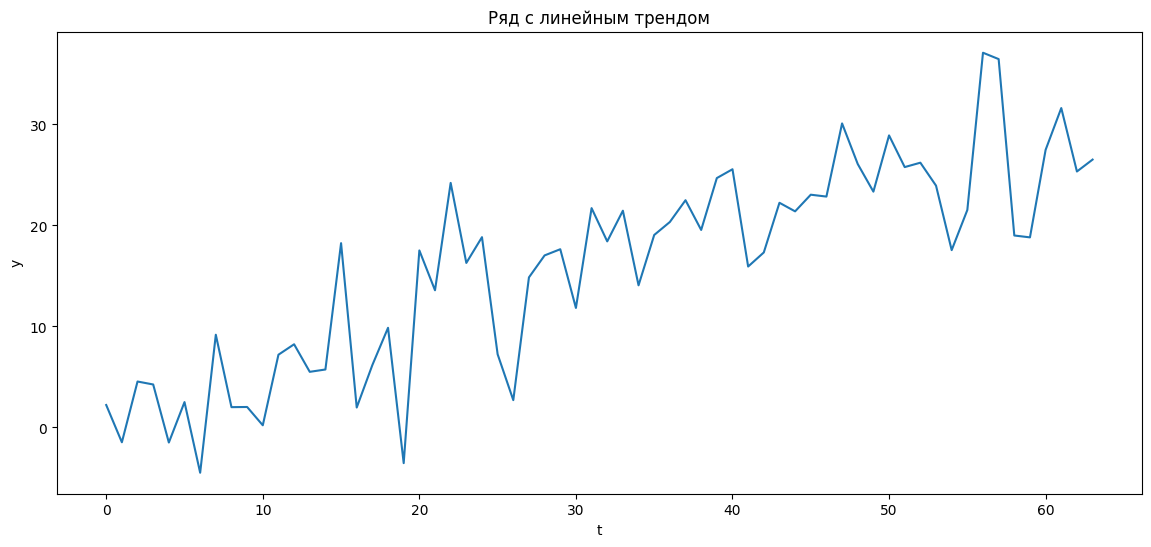

In [ ]:
plt.subplots(figsize=(14,6))
plt.plot(df2['t'], df2['y'])
plt.xlabel('t')
plt.ylabel('y')
plt.title('Ряд с линейным трендом')
plt.show()

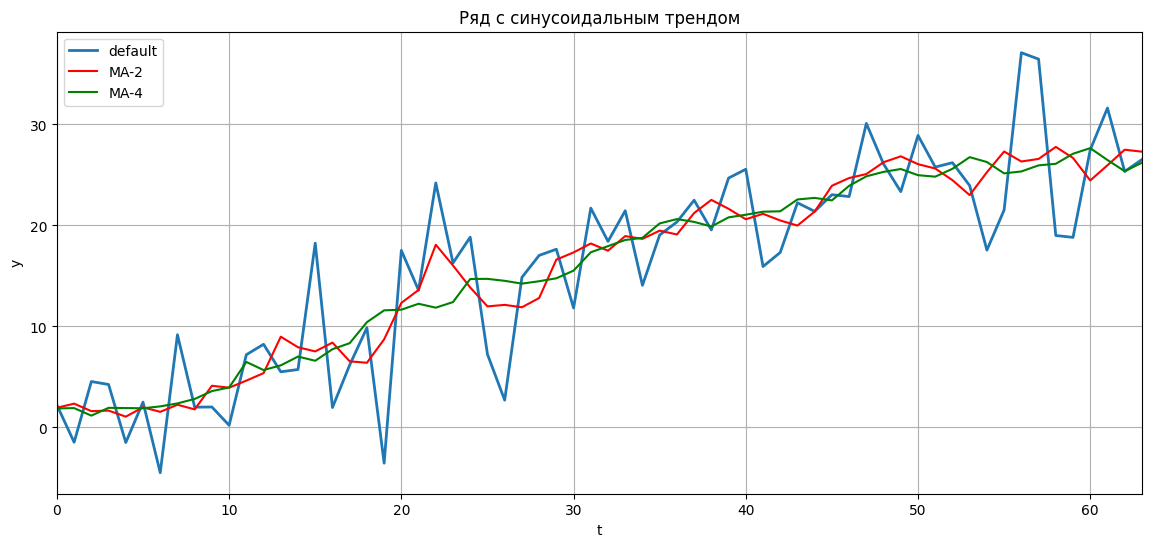

In [ ]:
# Метод простого скользящего среднего (Simple Moving Average, SMA)
df2_ = df2.copy()

df2_['MA-2'] = MA(df2_, 2)
df2_['MA-4'] = MA(df2_, 4)

plt.subplots(figsize=(14,6))
plt.plot(df2_['t'], df2_['y'],linewidth=2 , label='default') # unprocessed
plt.plot(df2_['t'], df2_['MA-2'], c='r', label='MA-2') # moving average window size = 2
plt.plot(df2_['t'], df2_['MA-4'], c='g', label='MA-4') # moving average window size = 4
plt.xlabel('t')
plt.ylabel('y')
plt.title('Ряд с синусоидальным трендом')
plt.legend()
plt.xlim((min(df2_['t']), max(df2_['t'])))

plt.grid()
plt.show()

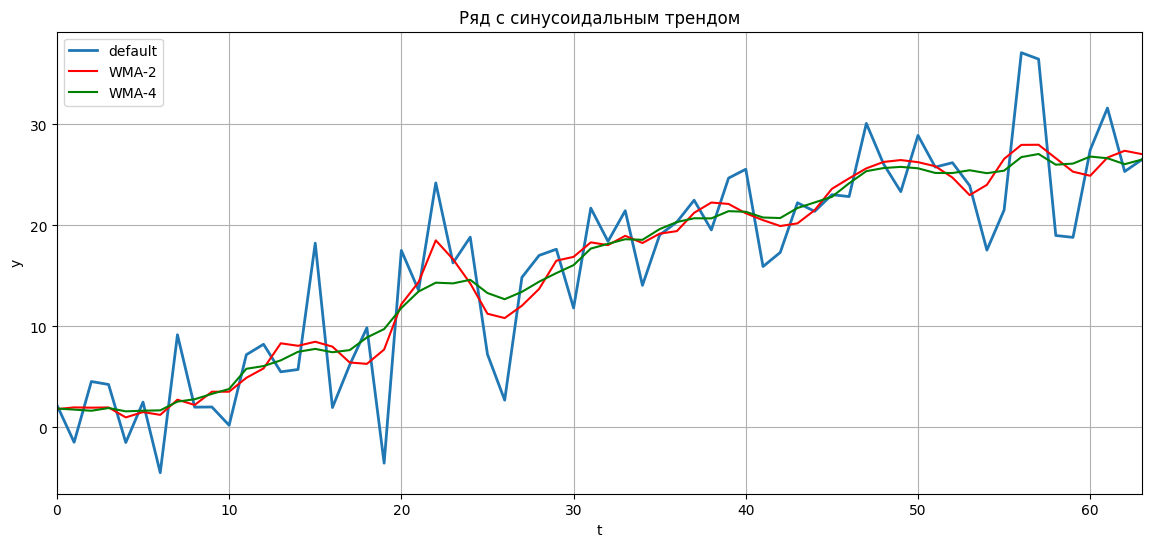

In [ ]:
# Метод взвешенного скользящего среднего (Weighted Moving Average, WMA)
df2_['WMA-2'] = WMA(df2_, 2)
df2_['WMA-4'] = WMA(df2_, 4)

plt.subplots(figsize=(14,6))
plt.plot(df2_['t'], df2_['y'],linewidth=2 , label='default') # unprocessed
plt.plot(df2_['t'], df2_['WMA-2'], c='r', label='WMA-2') # Weighted Moving Average window size = 2
plt.plot(df2_['t'], df2_['WMA-4'], c='g', label='WMA-4') #Weighted Moving Average window size = 4
plt.xlabel('t')
plt.ylabel('y')
plt.title('Ряд с синусоидальным трендом')
plt.legend()
plt.grid()
plt.xlim((min(df2_['t']), max(df2_['t'])))
plt.show()

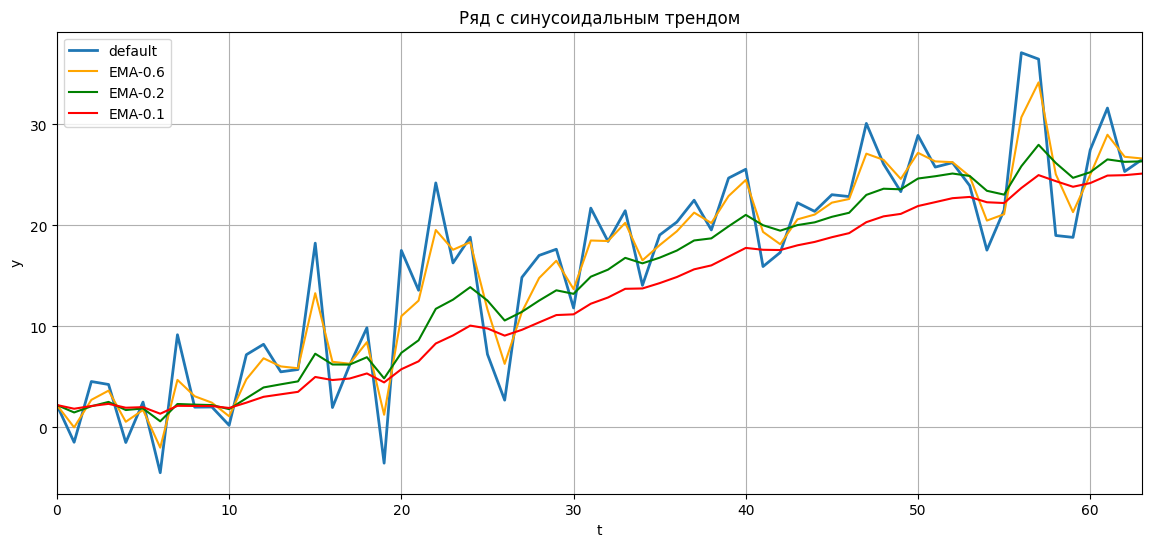

In [ ]:
# Метод экспоненциального сглаживания (EMA). (Exponential weighted moving average", EMA)
df2_['EMA-0.6'] = EMA(df2_, 0.6)
df2_['EMA-0.2'] = EMA(df2_, 0.2)
df2_['EMA-0.1'] = EMA(df2_, 0.1)

plt.subplots(figsize=(14,6))
plt.plot(df2_['t'], df2_['y'],linewidth=2 , label='default') # unprocessed
plt.plot(df2_['t'], df2_['EMA-0.6'], c='orange', label='EMA-0.6') # WExponential weighted moving average alpha = 0.6
plt.plot(df2_['t'], df2_['EMA-0.2'], c='g', label='EMA-0.2') # WExponential weighted moving average alpha = 0.2
plt.plot(df2_['t'], df2_['EMA-0.1'], c='r', label='EMA-0.1') # WExponential weighted moving average alpha = 0.1

plt.xlabel('t')
plt.ylabel('y')
plt.title('Ряд с синусоидальным трендом')
plt.legend()
plt.grid()
plt.xlim((min(df2_['t']), max(df2_['t'])))
plt.show()

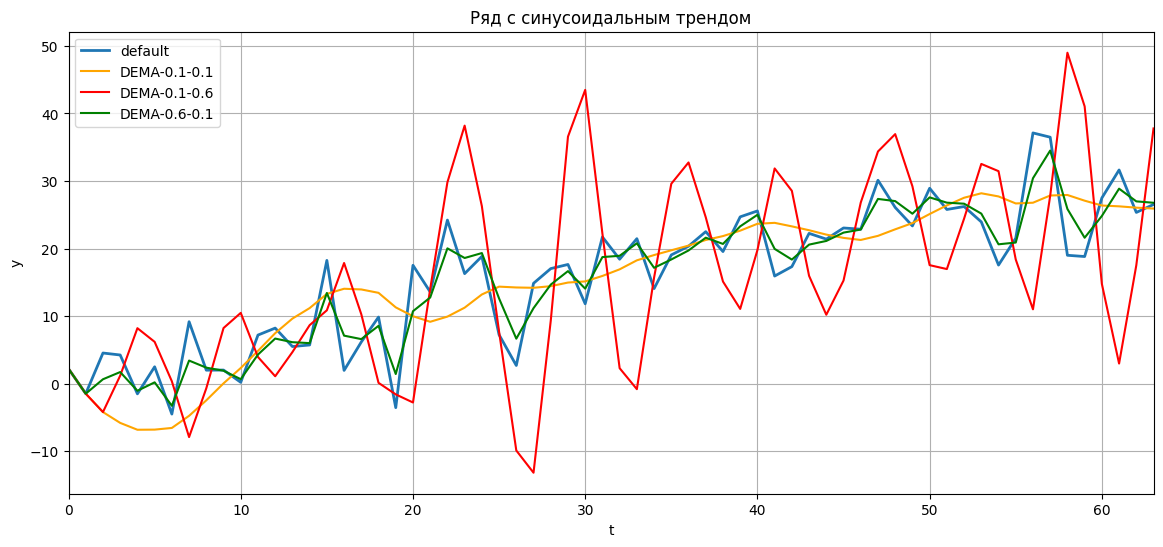

In [ ]:
df = df2.copy()

df2_['DEMA-0.1-0.1'] = DEMA(df2_, 0.1, 0.1)
df2_['DEMA-0.1-0.6'] = DEMA(df2_, 0.1, 0.9)
df2_['DEMA-0.6-0.1'] = DEMA(df2_, 0.6, 0.1)



plt.subplots(figsize=(14,6))
plt.plot(df2_['t'], df2_['y'],linewidth=2 , label='default') # unprocessed
plt.plot(df2_['t'], df2_['DEMA-0.1-0.1'], c='orange', label='DEMA-0.1-0.1') # WExponential weighted moving average alpha = 0.6
plt.plot(df2_['t'], df2_['DEMA-0.1-0.6'], c='r', label='DEMA-0.1-0.6') # WExponential weighted moving average alpha = 0.6
plt.plot(df2_['t'], df2_['DEMA-0.6-0.1'], c='g', label='DEMA-0.6-0.1') # WExponential weighted moving average alpha = 0.6



plt.xlabel('t')
plt.ylabel('y')
plt.title('Ряд с синусоидальным трендом')
plt.legend()
plt.grid()
plt.xlim((min(df2_['t']), max(df2_['t'])))
plt.show()